In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


<AxesSubplot:>

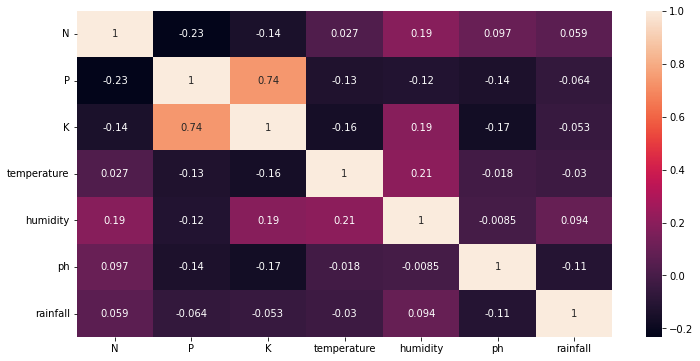

In [3]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(),annot = True)

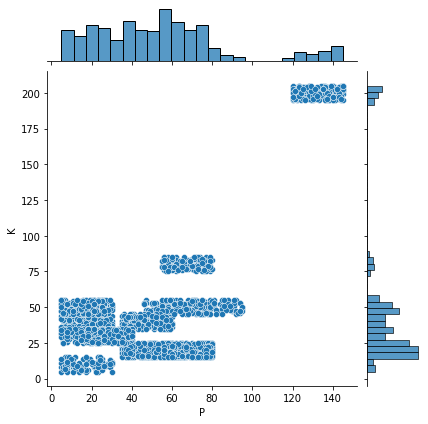

In [4]:
sns.jointplot(data = df,x = 'P',y = 'K')

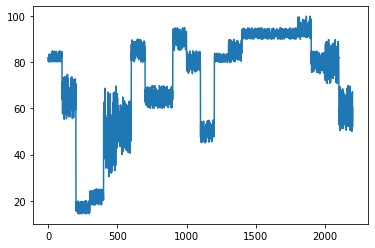

In [5]:
plt.plot(df['humidity'])

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 1)
new_f = pca.fit_transform(df[['P','K']])

In [7]:
df['new_var'] = new_f
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,new_var
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,-10.077882
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,-3.937654
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,-2.804450
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,-16.136583
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,-10.948166


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['label'].values)

LabelEncoder()

In [9]:
df['label'] = le.transform(df['label'].values)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,new_var
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20,-10.077882
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20,-3.937654
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20,-2.804450
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20,-16.136583
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20,-10.948166


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop(['label','P','K'],axis = 1).values
y = df['label'].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

### Metric info

In [13]:
from sklearn.metrics import classification_report

In [14]:
def get_metric(model,dataset,plot_cm = True,cp = True):
    features,labels = dataset
    predictions = model.predict(features)
    scores = model.predict_proba(features)
    
    if cp:
        report = classification_report(labels,predictions)
        print(report)
        
    
    

In [48]:
def plot_learning_curve(model,dataset):
    
    LearningCurveDisplay.from_estimator(model,dataset[0],dataset[1],score_type = "both",line_kw = {"marker":"o"},
                                        std_display_style="fill_between",fill_between_kw={"alpha":0.2},
                                        score_name = "Accuracy",
                                        cv = ShuffleSplit(n_splits=50,test_size=0.2))

### SVM

In [15]:
from sklearn.svm import SVC

In [49]:
svc = SVC(kernel = 'poly',probability=True)
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.9022038567493113

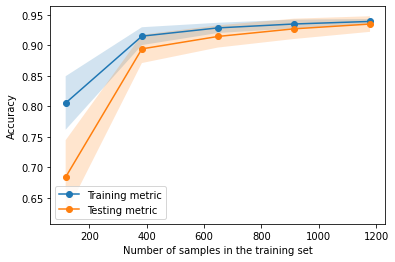

In [51]:
svc = SVC(kernel = 'poly',probability=True)
plot_learning_curve(svc,(X_train,y_train))

In [17]:
get_metric(lr,(X_train,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        72
           2       0.84      0.99      0.91        71
           3       1.00      1.00      1.00        59
           4       1.00      1.00      1.00        65
           5       1.00      0.99      0.99        67
           6       0.99      1.00      0.99        67
           7       1.00      1.00      1.00        75
           8       0.91      0.97      0.94        65
           9       0.96      0.88      0.92        59
          10       0.63      1.00      0.77        72
          11       0.98      0.88      0.93        68
          12       0.92      1.00      0.96        66
          13       0.67      0.23      0.34        62
          14       0.99      1.00      0.99        67
          15       1.00      1.00      1.00        74
          16       1.00      1.00      1.00        73
          17       1.00    

### Gradient Boosting

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
gs = GradientBoostingClassifier(n_estimators=9,max_depth=2)
gs = gs.fit(X_train,y_train)
gs.score(X_test,y_test)

0.928374655647383

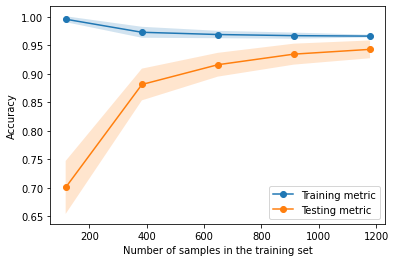

In [52]:
gs = GradientBoostingClassifier(n_estimators=9,max_depth=2)
plot_learning_curve(gs,(X_train,y_train))

In [20]:
get_metric(gs,(X_train,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        72
           2       0.91      1.00      0.95        71
           3       1.00      1.00      1.00        59
           4       1.00      0.95      0.98        65
           5       1.00      0.97      0.98        67
           6       0.99      1.00      0.99        67
           7       1.00      1.00      1.00        75
           8       0.84      1.00      0.92        65
           9       1.00      1.00      1.00        59
          10       0.85      0.99      0.91        72
          11       1.00      1.00      1.00        68
          12       0.83      0.98      0.90        66
          13       0.97      0.56      0.71        62
          14       0.99      1.00      0.99        67
          15       1.00      1.00      1.00        74
          16       1.00      1.00      1.00        73
          17       1.00    

### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dc = DecisionTreeClassifier(max_depth=8,splitter = 'best')
dc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [23]:
dc.score(X_test,y_test)

0.8911845730027548

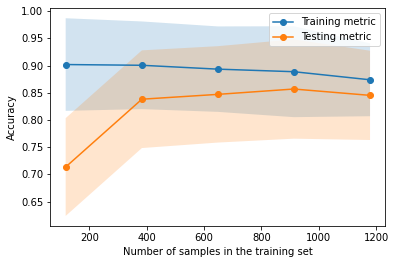

In [53]:
dc = DecisionTreeClassifier(max_depth=8,splitter = 'best')
plot_learning_curve(dc,(X_train,y_train))

In [24]:
get_metric(dc,(X_train,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        72
           2       0.78      1.00      0.88        71
           3       1.00      1.00      1.00        59
           4       1.00      1.00      1.00        65
           5       1.00      1.00      1.00        67
           6       1.00      1.00      1.00        67
           7       1.00      1.00      1.00        75
           8       1.00      0.15      0.27        65
           9       1.00      1.00      1.00        59
          10       0.63      1.00      0.77        72
          11       1.00      0.97      0.99        68
          12       0.96      1.00      0.98        66
          13       0.00      0.00      0.00        62
          14       1.00      1.00      1.00        67
          15       1.00      1.00      1.00        74
          16       1.00      1.00      1.00        73
          17       1.00    

### KNeightbors Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors= 3,algorithm='ball_tree',weights='distance',p = 1)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9696969696969697

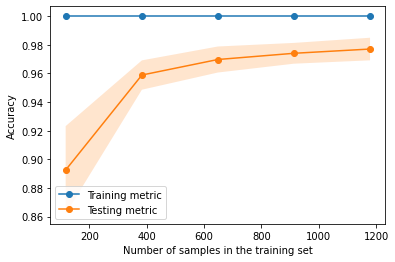

In [54]:
knn = KNeighborsClassifier(n_neighbors= 3,algorithm='ball_tree',weights='distance',p = 1)

plot_learning_curve(knn,(X_train,y_train))

In [27]:
get_metric(knn,(X_train,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        72
           2       1.00      1.00      1.00        71
           3       1.00      1.00      1.00        59
           4       1.00      1.00      1.00        65
           5       1.00      1.00      1.00        67
           6       1.00      1.00      1.00        67
           7       1.00      1.00      1.00        75
           8       1.00      1.00      1.00        65
           9       1.00      1.00      1.00        59
          10       1.00      1.00      1.00        72
          11       1.00      1.00      1.00        68
          12       1.00      1.00      1.00        66
          13       1.00      1.00      1.00        62
          14       1.00      1.00      1.00        67
          15       1.00      1.00      1.00        74
          16       1.00      1.00      1.00        73
          17       1.00    

### MLP NEURAL NET CLASSIFIER

In [28]:
from sklearn.neural_network import MLPClassifier

In [29]:
mlp = MLPClassifier(max_iter=300,solver = 'sgd').fit(X_train, y_train)
print(mlp.score(X_test,y_test))

0.931129476584022


In [ ]:
mlp = MLPClassifier(max_iter=300,solver = 'sgd').fit(X_train, y_train)
plot_learning_curve(mlp,(X_train,y_train))

In [30]:
get_metric(mlp,(X_train,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        72
           2       0.94      0.96      0.95        71
           3       1.00      1.00      1.00        59
           4       0.97      0.98      0.98        65
           5       1.00      0.99      0.99        67
           6       0.86      1.00      0.92        67
           7       1.00      1.00      1.00        75
           8       0.74      1.00      0.85        65
           9       0.96      0.83      0.89        59
          10       0.92      0.94      0.93        72
          11       0.98      0.84      0.90        68
          12       1.00      1.00      1.00        66
          13       0.97      0.94      0.95        62
          14       0.95      0.94      0.95        67
          15       1.00      1.00      1.00        74
          16       0.99      1.00      0.99        73
          17       1.00    